In [60]:
import pandas as pd

In [61]:
df=pd.read_csv('C:/Users/khush/OneDrive/Desktop/codes/datasets/Churn_Modelling.csv')

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.shape

(10000, 14)

In [64]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [65]:
x=df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
 'IsActiveMember', 'EstimatedSalary']]
#output data
y=df['Exited']

In [66]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [67]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

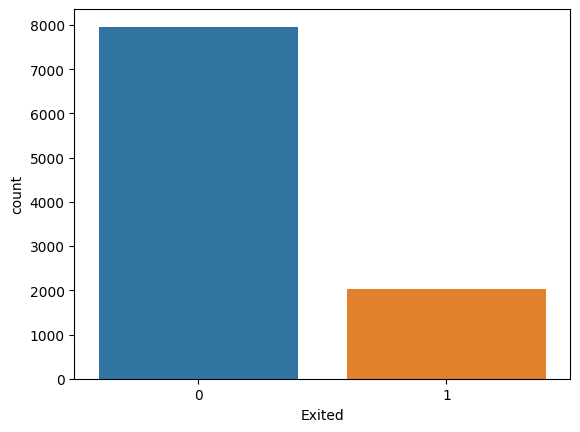

In [68]:
sns.countplot(x=y)

In [69]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [70]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imbalanced-learn in c:\users\khush\appdata\local\programs\python\python311\lib\site-packages (0.11.0)




[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from imblearn.over_sampling import RandomOverSampler

In [72]:
res=RandomOverSampler(random_state=1)

In [73]:
x_res,y_res=res.fit_resample(x,y)

In [74]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [76]:
x_scaled=scaler.fit_transform(x_res)

In [77]:
x_scaled

array([[-0.30317594,  0.07969247, -1.0276189 , ...,  0.65477112,
         1.0874469 ,  0.0032301 ],
       [-0.41466059, -0.01443957, -1.37123012, ..., -1.52725124,
         1.0874469 ,  0.19715802],
       [-1.48896724,  0.07969247,  1.0340484 , ...,  0.65477112,
        -0.91958513,  0.22122191],
       ...,
       [ 1.03463989,  0.64448473, -0.34039647, ..., -1.52725124,
         1.0874469 , -1.23001093],
       [ 0.18330254, -0.20270365, -1.0276189 , ...,  0.65477112,
        -0.91958513, -1.04712788],
       [ 0.75086077,  0.55035268,  1.72127083, ..., -1.52725124,
        -0.91958513,  0.03840677]])

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [80]:
x_scaled.shape

(15926, 8)

In [81]:
x_train.shape

(11944, 8)

In [82]:
y_res.shape

(15926,)

In [83]:
x_test.shape


(3982, 8)

In [84]:
from sklearn.neural_network import MLPClassifier

In [85]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=100,max_iter=100,activation='relu')

In [86]:
ann.fit(x_train,y_train)

c:\Users\khush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100,
              random_state=100)

In [87]:
y_pred=ann.predict(x_test)

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score

In [89]:
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

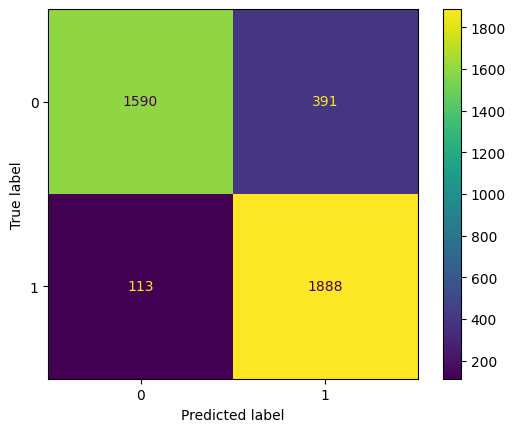

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [91]:
accuracy_score(y_test,y_pred)

0.8734304369663486

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1981
           1       0.83      0.94      0.88      2001

    accuracy                           0.87      3982
   macro avg       0.88      0.87      0.87      3982
weighted avg       0.88      0.87      0.87      3982

